<div style="
    background-color: #0b2343; 
    color: white; 
    padding: 25px; 
    font-family: Arial, sans-serif;
">
    <h2 style="margin: 0; font-size: 24px; font-weight: normal;">
        Data Analytics & Machine Learning in Finance
    </h2>
    <h1 style="margin: 5px 0 0 0; font-size: 48px; font-weight: bold;">
        Introduction
    </h1>
    <p style="margin: 8px 0 0 0; font-size: 18px;">
        Pedro Ramón Ventura Gómez
    </p>
    <p style="margin: 2px 0 0 0; font-size: 16px;">
        pventura@march-am.com
    </p>
</div>


# What is Artificial Intelligence?

<img src="./images/algorithms/ai-ml-dl-03.webp" style="display:block; margin:auto; width:30%">

- Artificial intelligence (AI) is a branch of computer science that focuses on creating systems that can perform tasks that normally require human intelligence.
- AI is based on the ability to make automated and logical decisions to address specific problems and tasks.

# Example of AI

Develop a rule set to build an algorithm.

<img src="./images/algorithms/loan_ini.png" style="display:block; margin:auto; width:75%">

- Define the objective
    - Approve or deny a loan.
- Identify patterns
    - credit_score > 700 -> approved
    - credit_score <= 700 -> denied
- Design rules

```python
if credit_score > 700:
    loan_status = 'Approved'
else:
    loan_status = 'Denied'
```

Ref.: https://www.kaggle.com/datasets/sujithmandala/simple-loan-classification-dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [42]:
file_path = r"..\dataset\loan.csv"
df = pd.read_csv(file_path)
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved


In [45]:
mask = df["loan_status"] == "Approved"
df.loc[mask, ["age", "income", "credit_score"]].mean()

age                40.311111
income          92955.555556
credit_score      745.111111
dtype: float64

In [46]:
mask = df["loan_status"] == "Denied"
df.loc[mask, ["age", "income", "credit_score"]].mean()


age                28.000
income          39687.500
credit_score      610.625
dtype: float64

# Artificial Intelligence (AI) vs Machine Learning (ML)

<table>
<tr>
    <th>Artificial Intelligence (AI)</th>
    <th>Machine Learning (ML)</th>
</tr>
<tr>
    <td>Expert knowledge</td>
    <td>Expert knowledge not required</td>
</tr>
<tr>
    <td>Development of rules</td>
    <td>Learning the rules</td>
</tr>
</table>

Do yo agree with "*Expert knowledge not required*"?

It is true that you do not always need domain expertise for a model to learn (because the algorithm extracts patterns from the data), but:
- **Data preprocessing**, **feature selection**, and **result interpretation** greatly benefit from expert knowledge.
- In complex contexts (such as finance, medicine, etc.), the complete **absence of domain knowledge often leads to serious errors**.


# Machine Learning (ML)

So, in Machine Learning:

* You don’t manually develop the rules; the algorithm learns the patterns on its own.
* The algorithm learns from data.
* The expert in the loop prepares the data and interprets the results.

For example, when dealing with financial assets, we typically use *logarithmic returns* rather than *prices*.

In [ ]:
# Download Apple price series for year 2020 (adjusted close)
# Please pay attention to 'auto_adjust=True'.
df = yf.download("AAPL", start="2020-01-01", end="2020-12-31", auto_adjust=True)["Close"]
df

[*********************100%***********************]  1 of 1 completed



Ticker,AAPL
Date,
2020-01-02,72.620842
2020-01-03,71.914803
2020-01-06,72.487854
2020-01-07,72.146942
2020-01-08,73.307495
...,...
2020-12-23,127.751740
2020-12-24,128.736984
2020-12-28,133.341354


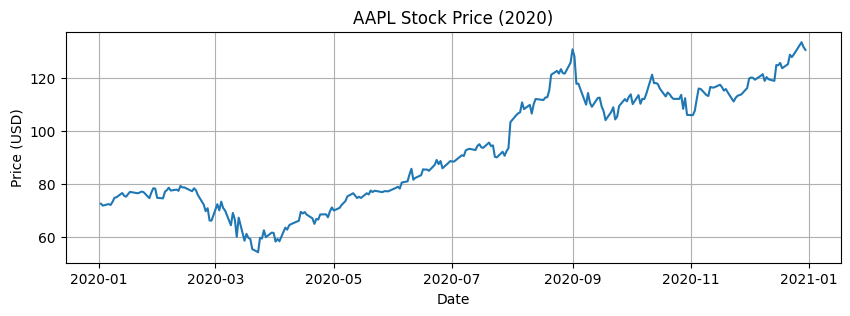

In [ ]:
# Plot price series.
plt.figure(figsize=(10, 3))
plt.plot(df)
plt.title("AAPL Stock Price (2020)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid()
plt.show()

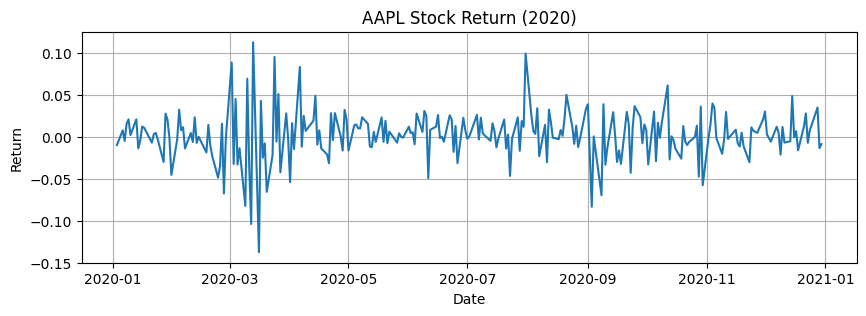

In [ ]:
# Compute logarithmic returns.
ret = np.log(df).diff().dropna()

# Plot return series.
plt.figure(figsize=(10, 3))
plt.plot(ret)
plt.title("AAPL Stock Return (2020)")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid()
plt.show()

# Machine Learning algorithms classification and tipical use cases

<table>
  <thead>
    <tr>
      <th>Learning Type</th>
      <th>Category / Algorithms</th>
      <th>Use Cases</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td rowspan="2">Supervised Learning</td>
      <td>
        Classification<br>
        <small>(Logistic Regression, Decision Trees, Random Forest, SVM, Neural Networks)</small>
      </td>
      <td>
        <ul>
          <li>Credit Scoring</li>
          <li>Credit Risk</li>
          <li>Fraud Detection</li>
          <li>Customer Retention</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td>
        Regression<br>
        <small>(Linear Regression, Random Forest Regression, Neural Networks)</small>
      </td>
      <td>
        <strong>Predictions</strong>
        <ul>
          <li>Property valuation</li>
          <li>Calculation of recovery rates on bad loans</li>
          <li>Estimating losses in the event of non-payment</li>
          <li>Estimating optimal commissions</li>
        </ul>
        <strong>Forecasting</strong>
        <ul>
          <li>Quantitative financial projections (revenue, expenditure)</li>
          <li>Interest rates or credit spreads</li>
          <li>Transaction volume</li>
          <li>Value at Risk (VaR)</li>
          <li>Alpha, Beta</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td rowspan="2">Unsupervised Learning</td>
      <td>
        Dimensionality Reduction<br>
        <small>(PCA, t-SNE, SVD)</small>
      </td>
      <td>
        <ul>
          <li>Structure Discovery</li>
          <li>Meaningful compression</li>
          <li>Big Data Visualization</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td>
        Clustering<br>
        <small>(K-Means, Hierarchical Clustering, DBSCAN)</small>
      </td>
      <td>
        <ul>
          <li>Recommender Systems</li>
          <li>Targeted Marketing</li>
          <li>Customer Segmentation</li>
          <li>Fraud Detection / Anomaly Detection</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td rowspan="2">Reinforcement Learning</td>
      <td>
        Bio-inspired algorithms<br>
        <small>(Genetic Algorithm (GA), Particle Swarm Optimization (PSO), Ant Colony Optimization (ACO), Artificial Bee Colony Algorithm (ABC))</small>
      </td>
      <td>
        <ul>
          <li>Optimization</li>
        </ul>
      </td>
    <tr>
      <td>
        Q-Learning, SARSA, Deep Q-Network (DQN), Actor-Critic (Policy Gradient)
      </td>
      <td>
        <ul>
          <li>Real-Time Decisions</li>
          <li>Market Regime Detection</li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>


# Supervised vs Unsupervised learning

<table border="1" cellpadding="6" cellspacing="0">
  <thead>
    <tr>
      <th>Aspect</th>
      <th>Supervised Learning</th>
      <th>Unsupervised Learning</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Definition</td>
      <td>Uses <i>labeled data</i> to train the model (input–output pairs are known).</td>
      <td>Uses <i>unlabeled data</i> to identify patterns, structures, or relationships.</td>
    </tr>
    <tr>
      <td>Goal</td>
      <td><i>Predict</i> outcomes or classify new data based on learned mappings.</td>
      <td><i>Discover</i> hidden structures, groupings, or data distributions.</td>
    </tr>
    <tr>
      <td>Training Data</td>
      <td>Requires <i>labeled datasets</i> (each sample has known outputs).</td>
      <td>Works with <i>unlabeled datasets</i> (no target outputs provided).</td>
    </tr>
    <tr>
      <td>Output</td>
      <td>Produces predictions for a known target variable (e.g., category, numerical value).</td>
      <td>Produces clusters, dimensionality reduction, or data groupings without predefined labels.</td>
    </tr>
    <tr>
      <td>Examples</td>
      <td>Linear Regression, Logistic Regression, Decision Trees (DT), Support Vector Machines (SVM), Neural Networks (NN) for classification or regression.</td>
      <td>K-Means Clustering, Hierarchical Clustering (HC), Principal Component Analysis (PCA), t-SNE, DBSCAN.</td>
    </tr>
  </tbody>
</table>


# Parametric vs Non-Parametric algorithms

<table border="1" cellpadding="6" cellspacing="0">
  <thead>
    <tr>
      <th>Aspect</th>
      <th>Parametric Algorithms</th>
      <th>Non-Parametric Algorithms</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Definition</td>
      <td>Assume a specific functional form for the mapping between inputs and outputs, defined by a fixed number of parameters.</td>
      <td>Do not assume a fixed functional form; model complexity can grow with the amount of data.<br>
      <small>Non-parametric does not mean "no parameters".</small>
      </td>
    </tr>
    <tr>
      <td>Number of Parameters</td>
      <td>Fixed.<br>
      <small>Although hyperparameters (e.g., polynomial degree) may need to be chosen.</small>
      </td>
      <td>Not fixed — can increase with the dataset size.</td>
    </tr>
    <tr>
      <td>Flexibility</td>
      <td>Less flexible; performance can suffer if the chosen functional form is incorrect.</td>
      <td>More flexible; can adapt to complex data patterns.<br>
      <small>High flexibility can also mean higher risk of overfitting, especially with small datasets.</small>
      </td>
    </tr>
    <tr>
      <td>Training</td>
      <td>Requires training to estimate optimal parameters.</td>
      <td>May involve storing all data (e.g., K-NN) or building a structure (e.g., Decision Trees).</td>
    </tr>
    <tr>
      <td>Prediction</td>
      <td>Fast once parameters are learned.</td>
      <td>Often slower, as predictions may require comparing a new point against many or all training points.</td>
    </tr>
    <tr>
      <td>Examples</td>
      <td>Linear Regression, Logistic Regression, Support Vector Machines (SVM).</td>
      <td>K-Nearest Neighbors (K-NN), Decision Trees (DT), Random Forests (RF).</td>
    </tr>
  </tbody>
</table>
